In [18]:
import torch
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from torch import utils

In [2]:
cifar10 = datasets.CIFAR10("./data", True, transform=transforms.ToTensor())
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
airplanes = [img for img in cifar10 if img[1] == 0]
birds = [img for img in cifar10 if img[1] == 2]

In [4]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 if label in [0, 2]]

In [5]:
splitted_rgb = torch.stack([ds[0] for ds in cifar2], dim=-1).view(3, -1)
mean = splitted_rgb.mean(dim=1)
std = splitted_rgb.std(dim=1)

In [6]:
normalizer = transforms.Normalize(mean, std)
normalized_cifar2 = [(normalizer(img), label) for img, label in cifar2]

In [69]:
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
    nn.LogSoftmax(dim=1)
)  # out 1: p(airplane), out 2: p(bird)

In [8]:
a = torch.tensor([5., 10.])

def softmax(x: torch.Tensor):
    return torch.exp(x) / torch.exp(x).sum()

softmax(a).sum().item() , torch.softmax(a, dim=0).sum().item()

(0.9999999403953552, 1.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9868888..1.9283539].


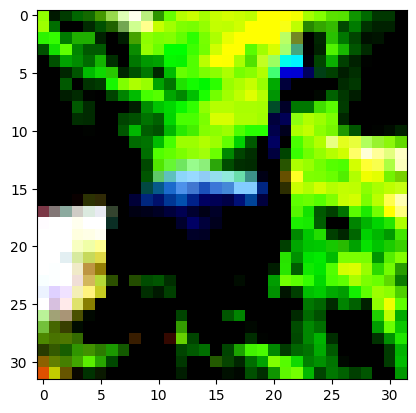

In [9]:
img, label = normalized_cifar2[0]
plt.imshow(img.permute(1,2,0))

In [11]:
cifar2_imagesn = torch.stack([img for img, _ in normalized_cifar2])
cifar2_imagesn = cifar2_imagesn.view(cifar2_imagesn.shape[0], -1).contiguous()
out = model(cifar2_imagesn)

In [12]:
labels = torch.tensor([label[1] for label in normalized_cifar2], dtype=torch.long)

labels

tensor([1, 1, 1,  ..., 0, 0, 1])

In [75]:
import torch.utils
import torch.utils.data


lossFn = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), 10)


epochs = 100
train_loader = torch.utils.data.DataLoader(normalized_cifar2, batch_size=64, shuffle=True)

for epoch in range(epochs):
    i = 0
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        predicted = model(imgs.view(batch_size, -1))
        loss = lossFn(predicted, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        i += 1

        if i % 10 == 0:
            print(loss)

    print(epoch)



tensor(2696.2349, grad_fn=<NllLossBackward0>)
tensor(5203.9448, grad_fn=<NllLossBackward0>)
tensor(6174.8589, grad_fn=<NllLossBackward0>)
tensor(4878.7412, grad_fn=<NllLossBackward0>)
tensor(2282.7437, grad_fn=<NllLossBackward0>)
tensor(4270.5034, grad_fn=<NllLossBackward0>)
tensor(3878.0398, grad_fn=<NllLossBackward0>)
tensor(7459.3955, grad_fn=<NllLossBackward0>)
tensor(3987.3154, grad_fn=<NllLossBackward0>)
tensor(907.6556, grad_fn=<NllLossBackward0>)
tensor(5588.9424, grad_fn=<NllLossBackward0>)
tensor(5938.4512, grad_fn=<NllLossBackward0>)
tensor(3518.1997, grad_fn=<NllLossBackward0>)
tensor(1428.3021, grad_fn=<NllLossBackward0>)
tensor(1447.4546, grad_fn=<NllLossBackward0>)
0
tensor(2660.3213, grad_fn=<NllLossBackward0>)
tensor(5112.2373, grad_fn=<NllLossBackward0>)
tensor(4499.1133, grad_fn=<NllLossBackward0>)
tensor(6296.6914, grad_fn=<NllLossBackward0>)
tensor(7579.0371, grad_fn=<NllLossBackward0>)
tensor(2009.2809, grad_fn=<NllLossBackward0>)
tensor(3031.8591, grad_fn=<NllLos

KeyboardInterrupt: 

In [85]:
total_params = sum(p.numel() for p in model.parameters())
total_params

3737474